In [23]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import pickle

In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
df=pd.read_csv("spotifyfinaldatasetforML.csv")

In [27]:
df=df.drop(['minor', 'key_0'], axis=1)

In [28]:
df.rename(columns = {'major':'mode'}, inplace = True)

In [29]:
df=df.drop_duplicates()

In [30]:
df

acousticness  danceability  duration_ms  energy  explicit  \
0           0.013100        0.2560       182347   0.895         0   
1           0.980000        0.2770       206972   0.145         0   
2           0.795000        0.6850       314667   0.483         0   
3           0.656000        0.7880       179747   0.808         0   
4           0.302000        0.0753       498560   0.150         0   
...              ...           ...          ...     ...       ...   
172225      0.000067        0.5670        37000   0.862         0   
172226      0.000994        0.3960       501824   0.979         0   
172227      0.864000        0.6380       161560   0.156         0   
172228      0.029900        0.5330       342827   0.547         0   
172229      0.141000        0.5260       139514   0.432         0   

        instrumentalness  liveness  loudness  popularity  speechiness  ...  \
0               0.000106    0.0821    -4.860          29       0.0707  ...   
1               0.879000    0.1110   -19.898           0       0.0845  ...   
2               0.878000    0.1130   -10.202           1       0.0337  ...   
3               0.000000    0.1540    -6.590           0       0.0395  ...   
4               0.884000    0.1210   -16.705           0       0.0371  ...   
...                  ...       ...       ...         ...          ...  ...   
172225          0.875000    0.4810    -5.617           0       0.0670  ...   
172226          0.609000    0.1360    -9.138           0       0.0878  ...   
172227          0.000000    0.1830   -17.372          20       0.0741  ...   
172228          0.011300    0.0723    -9.290          35       0.0326  ...   
172229          0.000120    0.1340   -11.197          40       0.0306  ...   

        danceability_ar  duration_ms_ar  energy_ar  instrumentalness_ar  \
0              0.523720   221014.800000   0.726840             0.023547   
1              0.464711   199313.805031   0.217114             0.549370   
2              0.630400   291778.600000   0.567800             0.895600   
3              0.739333   175231.000000   0.745000             0.000001   
4              0.196522   521790.596429   0.309415             0.665675   
...                 ...             ...        ...                  ...   
172225         0.568250    59083.333333   0.901500             0.589233   
172226         0.339000   425460.200000   0.950400             0.200648   
172227         0.566559   185540.118644   0.144858             0.018495   
172228         0.579875   285500.125000   0.699625             0.030261   
172229         0.613365   177608.115385   0.464369             0.002236   

        liveness_ar  loudness_ar  speechiness_ar    tempo_ar  valence_ar  \
0          0.174298    -7.711613        0.045116  132.180853    0.701493   
1          0.166036   -14.844384        0.071003  102.967642    0.539736   
2          0.114200   -10.003400        0.040800  117.398600    0.837800   
3          0.077933    -4.730333        0.138767  127.433000    0.929667   
4          0.246221   -15.794201        0.041948   94.257485    0.111619   
...             ...          ...             ...         ...         ...   
172225     0.452000    -5.451583        0.091167  114.964250    0.617500   
172226     0.161240    -6.851400        0.092040  155.379000    0.301200   
172227     0.153310   -18.590322        0.070195  107.036695    0.403746   
172228     0.140637    -7.646500        0.031175  123.744625    0.734750   
172229     0.156958   -13.552712        0.069631  127.905365    0.762731   

        popularity_ar  
0           36.833333  
1            2.974843  
2            6.800000  
3            2.000000  
4            1.666667  
...               ...  
172225       0.500000  
172226       0.000000  
172227      26.966102  
172228      27.500000  
172229      38.538462  

[170917 rows x 36 columns]

In [31]:
columns_to_remove = [col for col in df.columns if col.startswith('key_') or col == 'mode' or col.endswith('_ar')]

# Create a new DataFrame by excluding specified columns
new_df = df.drop(columns=columns_to_remove)

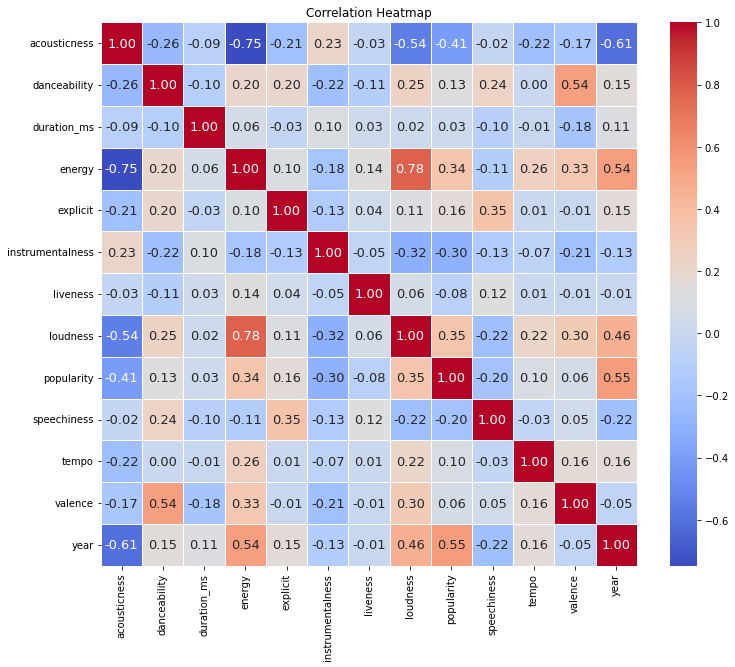

In [32]:
corr = new_df.corr()

# Create a correlation heatmap with larger font size for annotations
plt.figure(figsize=(12, 10))  # Increase the figsize as per your preference
sns.heatmap(corr, annot=True, annot_kws={"size": 13}, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [33]:
X = new_df.drop(columns=['popularity'])  # Exclude the target variable and 'year_difference' if needed
y = new_df['popularity']

             Feature  Importance
11              year    0.550444
5   instrumentalness    0.074847
7           loudness    0.050777
2        duration_ms    0.047519
0       acousticness    0.039830
3             energy    0.039772
6           liveness    0.038440
1       danceability    0.037643
8        speechiness    0.037164
10           valence    0.036927
9              tempo    0.035546
4           explicit    0.011090


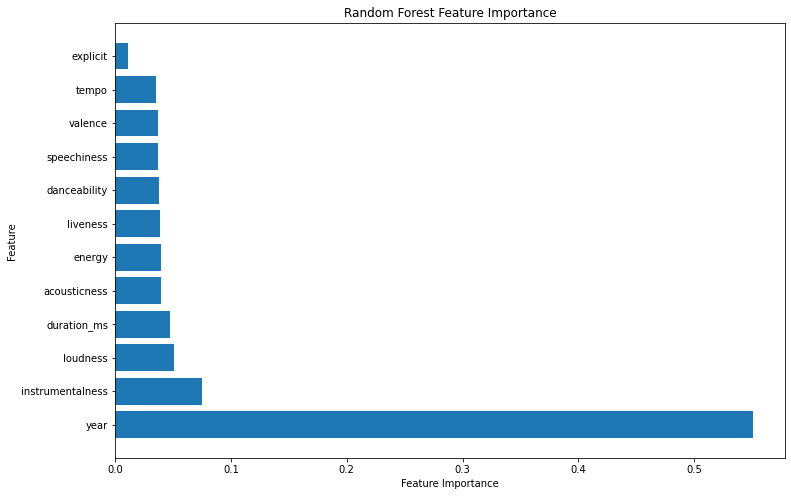

In [34]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to your data
rf_model.fit(X, y)

# Get feature importances from the trained model
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature names and their corresponding importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importance
print(feature_importance_df)

# Optionally, you can visualize the feature importance
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()

In [37]:
new_df

acousticness  danceability  duration_ms  energy  explicit  \
0           0.013100        0.2560       182347   0.895         0   
1           0.980000        0.2770       206972   0.145         0   
2           0.795000        0.6850       314667   0.483         0   
3           0.656000        0.7880       179747   0.808         0   
4           0.302000        0.0753       498560   0.150         0   
...              ...           ...          ...     ...       ...   
172225      0.000067        0.5670        37000   0.862         0   
172226      0.000994        0.3960       501824   0.979         0   
172227      0.864000        0.6380       161560   0.156         0   
172228      0.029900        0.5330       342827   0.547         0   
172229      0.141000        0.5260       139514   0.432         0   

        instrumentalness  liveness  loudness  popularity  speechiness  \
0               0.000106    0.0821    -4.860          29       0.0707   
1               0.879000    0.1110   -19.898           0       0.0845   
2               0.878000    0.1130   -10.202           1       0.0337   
3               0.000000    0.1540    -6.590           0       0.0395   
4               0.884000    0.1210   -16.705           0       0.0371   
...                  ...       ...       ...         ...          ...   
172225          0.875000    0.4810    -5.617           0       0.0670   
172226          0.609000    0.1360    -9.138           0       0.0878   
172227          0.000000    0.1830   -17.372          20       0.0741   
172228          0.011300    0.0723    -9.290          35       0.0326   
172229          0.000120    0.1340   -11.197          40       0.0306   

          tempo  valence  year  
0       191.307   0.5550  1978  
1        75.644   0.4940  1953  
2        97.694   0.8540  1954  
3       113.046   0.9690  1954  
4        76.558   0.0351  1951  
...         ...      ...   ...  
172225  102.828   0.7800  2018  
172226  161.461   0.2590  2014  
172227  103.905   0.4430  1958  
172228   72.506   0.6690  1972  
172229  114.362   0.7930  1972  

[170917 rows x 13 columns]

In [39]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = new_df.select_dtypes(include=numerics)
l = newdf.columns.values
len(l)

13

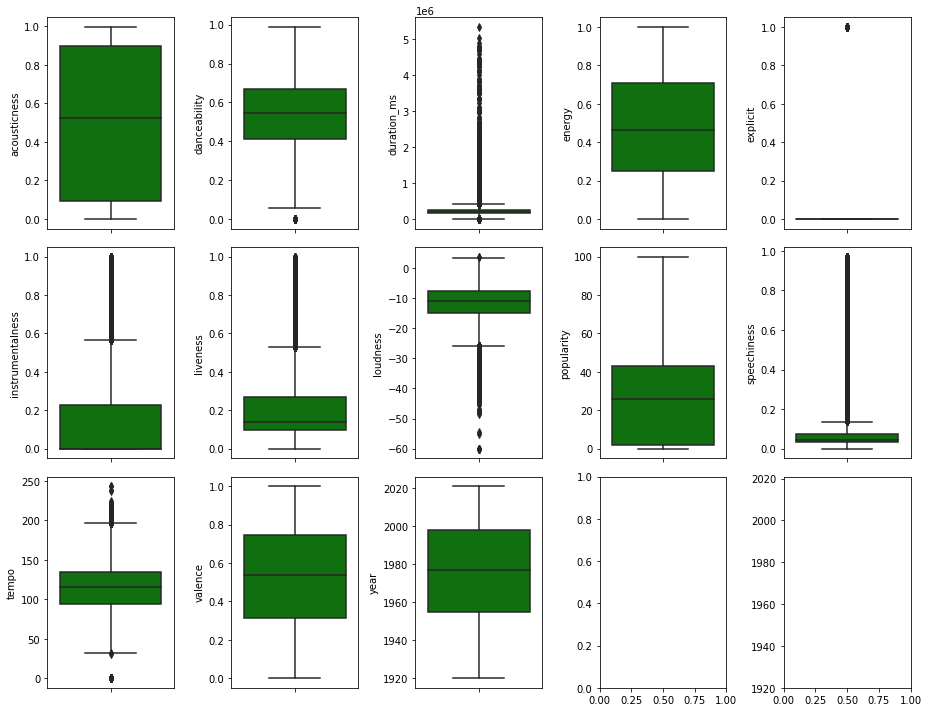

In [41]:
fig, axes = plt.subplots(3,5, figsize = (13,10))
a=0
for name in l:
    i,j = divmod(a, 5)
    sns.boxplot(y = newdf[name], ax = axes[i,j], color='green', showfliers=True)
    plt.ylim(newdf[name].min(),newdf[name].max())
    a += 1   

plt.tight_layout()
plt.show()